## Load Data-set

In [1]:
import pandas as pd 
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from collections import Counter
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv(r"C:\Users\sony\Downloads\Attachment (1)\train.csv")

In [3]:
data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


                 data have one text coulmn name comment want to classify each comments to know it's kind

## Clean the comment  coulmn 

In [4]:
# convert all the words to lowercase
data['comment_text'] = data['comment_text'].str.lower()
data

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,explanation\nwhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,d'aww! he matches this background colour i'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"hey man, i'm really not trying to edit war. it...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nmore\ni can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"you, sir, are my hero. any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::and for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,you should be ashamed of yourself \n\nthat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"spitzer \n\numm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,and it looks like it was actually you who put ...,0,0,0,0,0,0


In [5]:
#remove special charachters from each comment  by re.sub() 
#that  replace charachters by empty string based on regular expressions.
data['comment_text'] = data['comment_text'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))
data

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,explanation\nwhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,daww he matches this background colour im seem...,0,0,0,0,0,0
2,000113f07ec002fd,hey man im really not trying to edit war its j...,0,0,0,0,0,0
3,0001b41b1c6bb37e,\nmore\ni cant make any real suggestions on im...,0,0,0,0,0,0
4,0001d958c54c6e35,you sir are my hero any chance you remember wh...,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,and for the second time of asking when your vi...,0,0,0,0,0,0
159567,ffea4adeee384e90,you should be ashamed of yourself \n\nthat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,spitzer \n\numm theres no actual article for p...,0,0,0,0,0,0
159569,fff125370e4aaaf3,and it looks like it was actually you who put ...,0,0,0,0,0,0


In [6]:
#remove url by using str.replace()
#that replace any match comment by empty string 
data['comment_text'] = data['comment_text'].str.replace(r'http\S+', '', regex=True)  
data

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,explanation\nwhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,daww he matches this background colour im seem...,0,0,0,0,0,0
2,000113f07ec002fd,hey man im really not trying to edit war its j...,0,0,0,0,0,0
3,0001b41b1c6bb37e,\nmore\ni cant make any real suggestions on im...,0,0,0,0,0,0
4,0001d958c54c6e35,you sir are my hero any chance you remember wh...,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,and for the second time of asking when your vi...,0,0,0,0,0,0
159567,ffea4adeee384e90,you should be ashamed of yourself \n\nthat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,spitzer \n\numm theres no actual article for p...,0,0,0,0,0,0
159569,fff125370e4aaaf3,and it looks like it was actually you who put ...,0,0,0,0,0,0


In [7]:
# remove numbers by using str.replace
#that replace any number from 0-9 by empty string 
data['comment_text'] = data['comment_text'].str.replace('\d+', '')
data

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,explanation\nwhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,daww he matches this background colour im seem...,0,0,0,0,0,0
2,000113f07ec002fd,hey man im really not trying to edit war its j...,0,0,0,0,0,0
3,0001b41b1c6bb37e,\nmore\ni cant make any real suggestions on im...,0,0,0,0,0,0
4,0001d958c54c6e35,you sir are my hero any chance you remember wh...,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,and for the second time of asking when your vi...,0,0,0,0,0,0
159567,ffea4adeee384e90,you should be ashamed of yourself \n\nthat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,spitzer \n\numm theres no actual article for p...,0,0,0,0,0,0
159569,fff125370e4aaaf3,and it looks like it was actually you who put ...,0,0,0,0,0,0


In [8]:
# remove punctuation and new line by using re.sub
data['comment_text'] = data['comment_text'].apply(lambda x: re.sub(r'[{}]+'.format(re.escape(string.punctuation + '\n')), ' ', x))
data

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,explanation why the edits made under my userna...,0,0,0,0,0,0
1,000103f0d9cfb60f,daww he matches this background colour im seem...,0,0,0,0,0,0
2,000113f07ec002fd,hey man im really not trying to edit war its j...,0,0,0,0,0,0
3,0001b41b1c6bb37e,more i cant make any real suggestions on impr...,0,0,0,0,0,0
4,0001d958c54c6e35,you sir are my hero any chance you remember wh...,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,and for the second time of asking when your vi...,0,0,0,0,0,0
159567,ffea4adeee384e90,you should be ashamed of yourself that is a h...,0,0,0,0,0,0
159568,ffee36eab5c267c9,spitzer umm theres no actual article for pros...,0,0,0,0,0,0
159569,fff125370e4aaaf3,and it looks like it was actually you who put ...,0,0,0,0,0,0


## remove stop words

In [9]:
# stop ward contain words which i need to remove in language  English 
stop = set(stopwords.words('english'))

In [10]:
#remove stop words 
#split comments into a list of words based on whitespace
#and compare lists of comments and stop words then join words together  agin after remove sto words
data['comment_text'] = data['comment_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop]))
data

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,explanation edits made username hardcore metal...,0,0,0,0,0,0
1,000103f0d9cfb60f,daww matches background colour im seemingly st...,0,0,0,0,0,0
2,000113f07ec002fd,hey man im really trying edit war guy constant...,0,0,0,0,0,0
3,0001b41b1c6bb37e,cant make real suggestions improvement wondere...,0,0,0,0,0,0
4,0001d958c54c6e35,sir hero chance remember page thats,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,second time asking view completely contradicts...,0,0,0,0,0,0
159567,ffea4adeee384e90,ashamed horrible thing put talk page 128611993,0,0,0,0,0,0
159568,ffee36eab5c267c9,spitzer umm theres actual article prostitution...,0,0,0,0,0,0
159569,fff125370e4aaaf3,looks like actually put speedy first version d...,0,0,0,0,0,0


## Tokenize the comment column

In [11]:
# tokenize comments by using   word_tokenize function 
#that split into a list of words.
data['comment_text']= data['comment_text'].apply(lambda x: nltk.word_tokenize(x))
data

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,"[explanation, edits, made, username, hardcore,...",0,0,0,0,0,0
1,000103f0d9cfb60f,"[daww, matches, background, colour, im, seemin...",0,0,0,0,0,0
2,000113f07ec002fd,"[hey, man, im, really, trying, edit, war, guy,...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"[cant, make, real, suggestions, improvement, w...",0,0,0,0,0,0
4,0001d958c54c6e35,"[sir, hero, chance, remember, page, thats]",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,"[second, time, asking, view, completely, contr...",0,0,0,0,0,0
159567,ffea4adeee384e90,"[ashamed, horrible, thing, put, talk, page, 12...",0,0,0,0,0,0
159568,ffee36eab5c267c9,"[spitzer, umm, theres, actual, article, prosti...",0,0,0,0,0,0
159569,fff125370e4aaaf3,"[looks, like, actually, put, speedy, first, ve...",0,0,0,0,0,0


In [12]:
data['comment_text']

0         [explanation, edits, made, username, hardcore,...
1         [daww, matches, background, colour, im, seemin...
2         [hey, man, im, really, trying, edit, war, guy,...
3         [cant, make, real, suggestions, improvement, w...
4                [sir, hero, chance, remember, page, thats]
                                ...                        
159566    [second, time, asking, view, completely, contr...
159567    [ashamed, horrible, thing, put, talk, page, 12...
159568    [spitzer, umm, theres, actual, article, prosti...
159569    [looks, like, actually, put, speedy, first, ve...
159570    [really, dont, think, understand, came, idea, ...
Name: comment_text, Length: 159571, dtype: object

## stemming  the comment column 

In [13]:
#The Snowball stemmer is used for word stemming.
stemmer = SnowballStemmer('english')

# stem(back words to it's root  ) each word  and then join them back together with spaces
data['comment_text'] = data['comment_text'].apply(lambda x: [stemmer.stem(word) for word in x])


In [14]:
data

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,"[explan, edit, made, usernam, hardcor, metalli...",0,0,0,0,0,0
1,000103f0d9cfb60f,"[daww, match, background, colour, im, seem, st...",0,0,0,0,0,0
2,000113f07ec002fd,"[hey, man, im, realli, tri, edit, war, guy, co...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"[cant, make, real, suggest, improv, wonder, se...",0,0,0,0,0,0
4,0001d958c54c6e35,"[sir, hero, chanc, rememb, page, that]",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,"[second, time, ask, view, complet, contradict,...",0,0,0,0,0,0
159567,ffea4adeee384e90,"[asham, horribl, thing, put, talk, page, 12861...",0,0,0,0,0,0
159568,ffee36eab5c267c9,"[spitzer, umm, there, actual, articl, prostitu...",0,0,0,0,0,0
159569,fff125370e4aaaf3,"[look, like, actual, put, speedi, first, versi...",0,0,0,0,0,0


In [15]:
#make data in one list 
lists = [token for sublist in data['comment_text'] for token in sublist]

# calculate  frequency of each word
count = Counter(lists)

#save top 50
top = count.most_common(50)  
#print in top 50 in data frame 
df = pd.DataFrame(top, columns = ['Word', 'Count'])
df


,Word,Count
0,articl,72948
1,page,56443
2,edit,40526
3,wikipedia,38380
4,use,34798
5,talk,33885
6,like,30168
7,one,29932
8,pleas,29781
9,would,29212


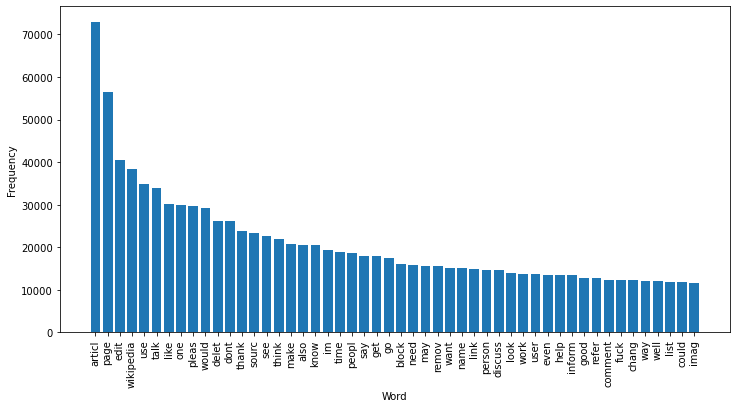

In [16]:
# Plot the top 50 words
plt.figure(figsize=(12, 6))
plt.bar(df['Word'], df['Count'])
plt.xticks(rotation=90)
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.show()



              From histogram the most frequency words is article and page 